In [342]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [343]:
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam (8).csv


In [344]:
import io
df = pd.read_csv(io.BytesIO(uploaded['spam.csv']),encoding = 'ISO-8859-1')

In [345]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [346]:
df.shape

(5572, 5)

Dataset contains 5572 rows and 5 columns

In [347]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## Data Cleaning

In [348]:
df.isnull().sum()/len(df)*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

As we can see that three columns have null values more than 99%. We will drop these columns

In [349]:
df = df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [350]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [351]:
# Renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)


In [352]:
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [353]:
# Encoding target column
from sklearn.preprocessing import LabelEncoder
ec = LabelEncoder()

In [354]:
df['target'] = ec.fit_transform(df['target'])

In [355]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [356]:
df.isna().sum()

target    0
text      0
dtype: int64

No missing value

In [357]:
# check for duplicate value
df.duplicated().sum()

403

There are 403 duplicated values

In [358]:
# Removing duplicates and keeping first value
df = df.drop_duplicates(keep='first')

In [359]:
df.shape

(5169, 2)

## Exploratory Data Analysis

In [360]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

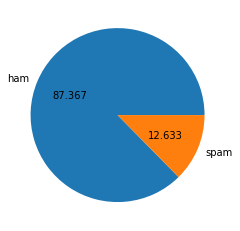

In [361]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.3f')
plt.show()

As we can see that Our data is Imbalanced.

#### Balancing the dataset by Up Sampling

In [362]:
from sklearn.utils import resample

In [364]:
# Separate majority and minority classes
df_majority = df[df.target==0]
df_minority = df[df.target==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=4516,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df.target.value_counts()

1    4516
0    4516
Name: target, dtype: int64

In [365]:
import nltk
# Downloading dependencies of nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [366]:
df_num_characters = df['text'].apply(len)
df['num_characters'] = df_num_characters

these are number of characters in each sms

In [367]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
6,0,Even my brother is not like to speak with me. ...,77


In [368]:
# words in each sms
df['text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy.., Availab...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
6       [Even, my, brother, is, not, like, to, speak, ...
                              ...                        
4246    [Text, PASS, to, 69669, to, collect, your, pol...
3493    [You, are, being, contacted, by, our, dating, ...
4458    [Welcome, to, UK-mobile-date, this, msg, is, F...
788     [5, Free, Top, Polyphonic, Tones, call, 087018...
1307    [Get, 3, Lions, England, tone, ,, reply, lionm...
Name: text, Length: 9032, dtype: object

In [369]:
# Counting these number of words in each sms
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [370]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,23
1,0,Ok lar... Joking wif u oni...,29,8
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
6,0,Even my brother is not like to speak with me. ...,77,18


In [371]:
# counting number of sentences in each sms
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [372]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2


In [373]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,9032.000000,9032.000000,9032.000000
mean,103.994686,22.136182,2.396258
std,56.671060,11.892007,1.540607
min,2.000000,1.000000,1.000000
25%,49.000000,12.000000,1.000000
50%,115.000000,24.000000,2.000000
75%,153.000000,30.000000,3.000000
max,910.000000,219.000000,38.000000


As we can see that average number of characters in one sms is 104, average number of words in one sms is 22 and avarge number of sentences in one sms is 2. maximum number of characters that one/more sms have are 910.

In [374]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,23,2
1,0,Ok lar... Joking wif u oni...,29,8,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
6,0,Even my brother is not like to speak with me. ...,77,18,2


<function matplotlib.pyplot.show>

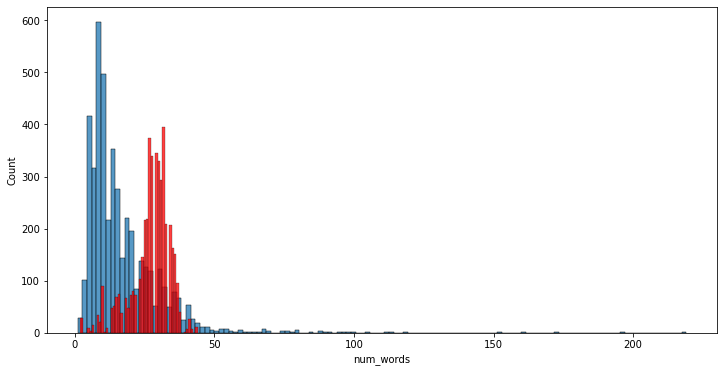

In [375]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')
plt.show

As we can see that most of the ham sms consist of less words as compare to spam sms

<function matplotlib.pyplot.show>

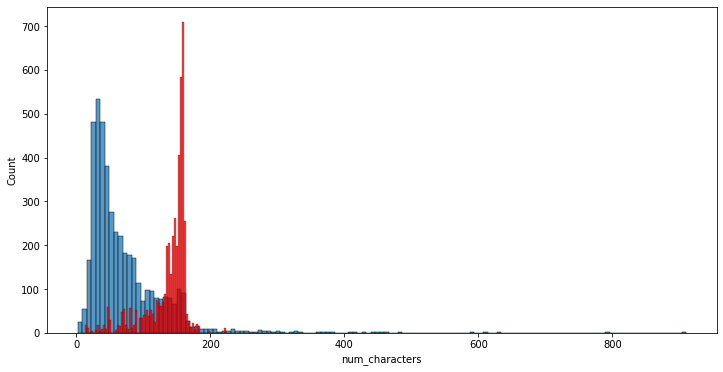

In [376]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')
plt.show

As we can see that most of the spam sms consist of more characters as compare to ham sms

<function matplotlib.pyplot.show>

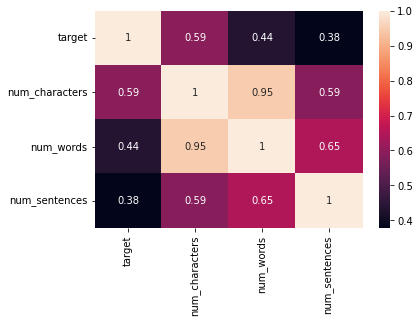

In [377]:
# correlation between features and with target
sns.heatmap(df.corr(),annot=True)
plt.show

* num_characters has highest correlation with target
* Features are highy correlated with each other. There is multicollinearity between features.
so, we will keep num_characters as it has highest correlation with target and we will drop num_words and num_sentences because of multicollinearity.

## Text preprocessing

In [378]:
df = df.drop(columns=['num_words','num_sentences'])

In [379]:
# converting in lower case
# tokenization
# removing special characters
# removing stopwords and punctuations
# stemming
nltk.download('stopwords')
from nltk.corpus import stopwords
stp = stopwords.words('english')
import string
sr = string.punctuation
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [380]:
def transform_text(text):
# converting in lower case
  text = text.lower()
# tokenization
  text = nltk.word_tokenize(text)
# removing special characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
# removing stopwords and punctuations
  for i in text:
    if i not in stp and i not in sr:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))
  return ' '.join(y)



In [381]:
df['transformed_text'] = df['text'].apply(transform_text)

In [382]:
df.head()

,target,text,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,go jurong point avail bugi n great world la e ...
1,0,Ok lar... Joking wif u oni...,29,ok lar joke wif u oni
3,0,U dun say so early hor... U c already then say...,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,nah think goe usf live around though
6,0,Even my brother is not like to speak with me. ...,77,even brother like speak treat like aid patent


In [383]:
# wordcloud 
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')

In [384]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

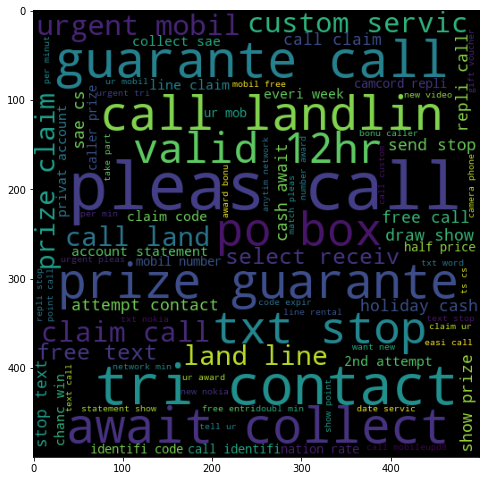

In [385]:
# plotting spam sms wordcloud
plt.figure(figsize=(8,12))
plt.imshow(spam_wc)

As we can see that in spam sms, words like call, free, credit, prize guarante, private account, win, offer, etc are most common words. let's see in ham sms----

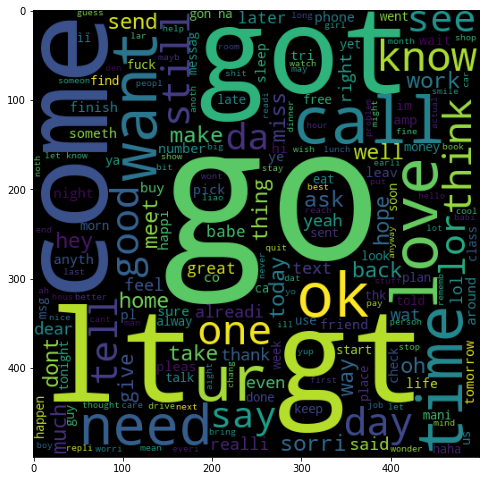

In [386]:
# plotting ham sms wordcloud
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(8,12))
plt.imshow(ham_wc)

As we can see that in ham sms words like good, know, come, love, ok, go, need, got, call, want, it, etc are most common words.

In [387]:
# Top 50 words in spam sms
spam_corpus = []
for sms in df[df['target'] == 1]['transformed_text'].tolist():  # here making list of sms of all spam sms
  for word in sms.split():
    spam_corpus.append(word)

In [388]:
len(spam_corpus)

68303

All spam sms contain 68303 words

In [389]:
from collections import Counter

In [390]:
# Top 50 words in spam sms
pd.DataFrame(Counter(spam_corpus).most_common(20))


,0,1
0,call,2324
1,free,1312
2,2,1082
3,txt,942
4,text,877
5,u,801
6,mobil,799
7,stop,792
8,ur,783
9,claim,766


These are the most common 20 words in spam sms.

In [391]:
ham_corpus = []
for sms in df[df['target'] == 0]['transformed_text'].tolist():  # here making list of sms of all spam sms
  for word in sms.split():
    ham_corpus.append(word)

In [392]:
len(ham_corpus)

34771

All ham sms contain 34771 words

In [393]:
# Top 50 words in ham sms
pd.DataFrame(Counter(ham_corpus).most_common(20))

,0,1
0,u,871
1,go,401
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,272
7,got,236
8,like,234
9,know,234


These are the most common 50 words in ham sms

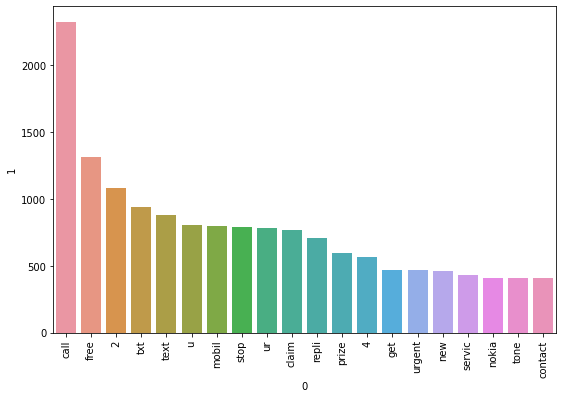

In [394]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(20))[0],pd.DataFrame(Counter(spam_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

This is the frequency of words in spam sms

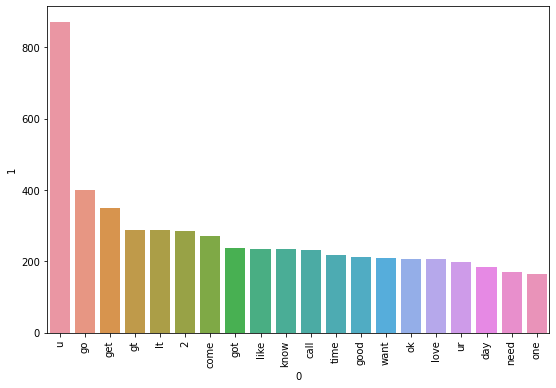

In [395]:
plt.figure(figsize=(9,6))
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(20))[0],pd.DataFrame(Counter(ham_corpus).most_common(20))[1])
plt.xticks(rotation='vertical')
plt.show()

this is the frequency of words in ham sms

## Modelling

In [396]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

#### Trying Bag of words

In [397]:
x = cv.fit_transform(df['transformed_text']).toarray()
x.shape

(9032, 6604)

In [398]:
y = df['target'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict

In [400]:
lr = LogisticRegression()
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
adb = AdaBoostClassifier()
xgb = XGBClassifier()

In [401]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [402]:
clfs = {
    'lr':lr,
    'mnb':mnb,
    'gnb':gnb,
    'bnb':bnb,
    'knn':knn,
    'rfc':rfc,
    'adb':adb,
    'xgb':xgb
}

In [403]:
def train_classifier(clf,X_train,Y_train,X_test,Y_test):
  clf.fit(X_train,Y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(Y_test,y_pred)
  precision = precision_score(Y_test,y_pred)
  return accuracy,precision

In [404]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [405]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [406]:
performance_df

,Algorithm,Accuracy,Precision
3,bnb,0.987272,1.000000
5,rfc,0.999447,0.998878
4,knn,0.984505,0.998843
0,lr,0.997233,0.994413
6,adb,0.956281,0.973162
1,mnb,0.976204,0.967956
7,xgb,0.928611,0.952438
2,gnb,0.923630,0.865759


#### Trying Tfidf

In [407]:
tfidf = TfidfVectorizer()
x = tfidf.fit_transform(df['transformed_text']).toarray()
x.shape

(9032, 6604)

In [408]:
y = df['target'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [409]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [410]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [412]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [413]:
performance_df

,Algorithm,Accuracy,Precision
3,bnb,0.987272,1.000000
5,rfc,1.000000,1.000000
4,knn,0.978417,0.997661
0,lr,0.991146,0.993228
6,adb,0.952407,0.975177
1,mnb,0.978971,0.968132
7,xgb,0.937465,0.957597
2,gnb,0.926951,0.870841
